# This is a notebook that reads in the Pan-STARRS data alongside the matched DP0 data.

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
import math 

In [2]:
def plotter(x,y,xtitle,ytitle):
    scatter = plt.plot(x, y, '.r') 
    plt.title(xtitle+' vs '+ytitle)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()
    return


Read in the csv file

In [3]:
galaxies = pd.read_csv('truth_DP0_phosim_real.csv')

#These are DP0 values
ra = galaxies['ra_1']
dec = galaxies['dec_1']
z_phot = galaxies['z_phot']  #PanSTARRS photo-z
redshift = galaxies['redshift'] #DC2 photo-z
r = galaxies['mag_r_2']
i = galaxies ['mag_i']
g = galaxies['mag_g']
#print(r-i)

#These are Pan-STARRS values
ra_ps = galaxies['raStack']
dec_ps = galaxies['decStack']
r_ps = galaxies['rApMag']
i_ps = galaxies['iApMag']
g_ps = galaxies['gApMag']
#print(r_ps - i_ps)

In [4]:
print(ra[0])

60.2294718


This routine below takes the DP0 RA and DEC and joins them with the u,g,r,i magnitudes for the 20 KN and prints to a file

In [10]:
f = open('/home/mwiesner/KDC/notebooks/DP0/magnitudes.txt', "w")
f.write('ra,dec,u,g,r,i,time \n')
for i in range(0,20):
    galaxies = pd.read_csv('/home/mwiesner/KDC/notebooks/output/light_curve_'+str(i)+'.txt')
    fine = galaxies[galaxies['time']==0.05]
    u = fine['u']
    g = fine['g']
    r = fine['r']
    ii = fine['i']
    time = fine['time']
    f.write(str(ra[i])+','+str(dec[i])+','+u.to_string(index=False)+','+g.to_string(index=False)+','+r.to_string(index=False)+','+ii.to_string(index=False)+','+time.to_string(index=False)+"\n")
            
 #   print(u[i],g[i],r[i],ii[i])
 #   f.write(str(ra[i])+str(dec[i]))#+str(u)+str(g)+str(r)+str(i)+str(time))
f.close()

## Plot of r-i color of DC2 vs r-i color of DP0. This is what the galaxies matched on.

ValueError: x and y must have same first dimension, but have shapes (1,) and (25,)

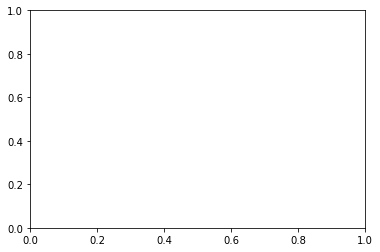

In [7]:
plotter((r-i),(r_ps-i_ps), 'DC2 r-i color', 'DP0 r-i color')
#plt.title('RA vs DEC')
#plt.xlabel('RA')
#plt.ylabel('DEC')
#plt.xlim(59.2,60.2)
#plt.ylim(-37.4,-36.4)
#plt.xlabel('MJD')
#plt.ylabel('u-band magnitude')
#plt.xlim(57980,57996)
#plt.gca().invert_yaxis()
#plt.show()

In [ ]:
plotter((g-r),(g_ps-r_ps), 'DC2 g-r color', 'DP0 g-r color') 


Text(0.5, 1.0, 'Histogram of real photometric redshifts')

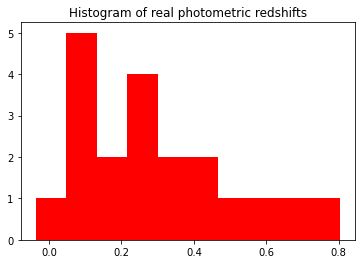

In [8]:
plt.hist(z_phot, bins=10, color='r')
plt.title('Histogram of real photometric redshifts')

Text(0.5, 1.0, 'Histogram of DC2 redshifts')

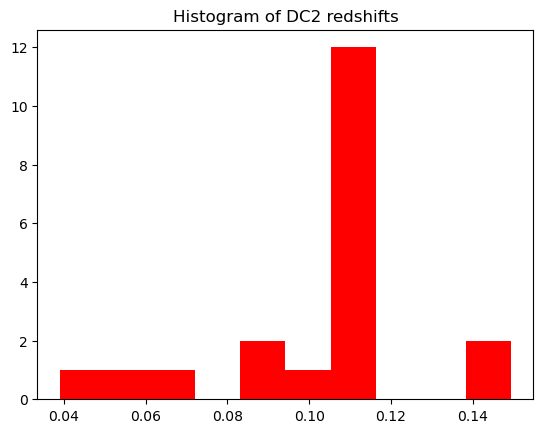

In [49]:
plt.hist(redshift, bins=10, color='r')
#plt.title('Histogram of DC2 redshifts')

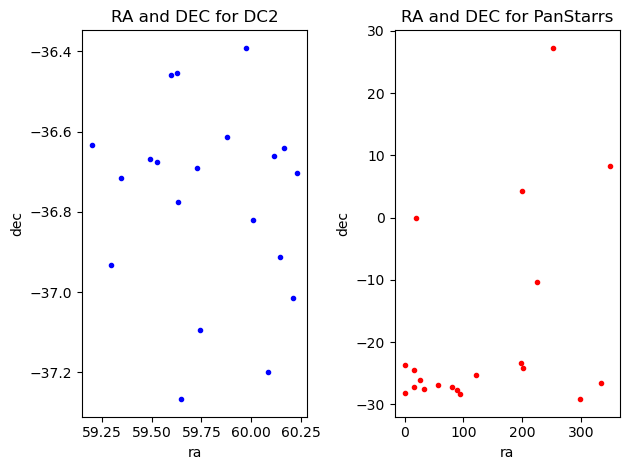

In [39]:
#The parameters for subplot are: number of rows, number of columns, and which subplot you're currently on. 


plt.subplot(1, 2, 1)
plt.plot(ra, dec, 'b.')
plt.title('RA and DEC for DC2')
plt.xlabel('ra')
plt.ylabel('dec')



plt.subplot(1, 2, 2)
plt.plot(ra_ps, dec_ps, 'r.')
plt.title('RA and DEC for PanStarrs')
plt.xlabel('ra')
plt.ylabel('dec')

plt.tight_layout()
#plt.show()

In [41]:
print(np.min(redshift))

0.0390755
